<a href="https://colab.research.google.com/github/PrudenceMu/iInflation-rates-data-analysis/blob/main/Inflation_rates_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Defining the data analytic question


"How does inflation vary seasonally and over different periods, and what factors contribute to these variations?"

**Hypotheses:**


1.12 Month inflation rate has shown a a declining trend over the years

2.inflation rates exhibit significant seasonality

3.The variance has decreased overtime indicating price stability

4.post 2020(after covid), inflation rates have been high as compared to pre 2020 levels

5.The correlation between annual average inflation and 12month inflation is statistically significant.





In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data
data = pd.read_excel('/content/Inflation Rates.xlsx')

In [ ]:
#learn more about the data
data.head()
data.info()
data.shape
data.describe()
data.tail(10)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      237 non-null    int64  
 1   Month                     237 non-null    object 
 2   Annual Average Inflation  237 non-null    float64
 3   12-Month Inflation        237 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.5+ KB
Year                        0
Month                       0
Annual Average Inflation    0
12-Month Inflation          0
dtype: int64


In [ ]:
data.describe()

,Year,Month,Annual Average Inflation,12-Month Inflation,Annual Average MA,12-Month MA
count,236.000000,236.000000,236.000000,236.000000,225.000000,225.000000
mean,2014.338983,6.432203,7.699746,7.509915,7.591033,7.432330
std,5.691682,3.445574,3.304273,3.923704,2.812952,3.141860
min,2005.000000,1.000000,3.930000,1.850000,4.597500,3.927500
25%,2009.000000,3.000000,5.530000,5.000000,5.614167,5.321667
50%,2014.000000,6.000000,6.520000,6.375000,6.599167,6.450000
75%,2019.000000,9.000000,8.430000,8.330000,8.148333,8.121667
max,2024.000000,12.000000,17.070000,19.720000,15.391667,17.116667


In [ ]:
# enter time stamps

date_range = pd.date_range(start='2005-01-01', end='2024-08-31', freq='M')
data = data.set_index(date_range)
data.tail()


,Year,Month,Annual Average Inflation,12-Month Inflation
2024-04-30,2024,April,6.73,5.00
2024-05-31,2024,May,6.49,5.10
2024-06-30,2024,June,4.64,6.22
2024-07-31,2024,July,5.97,4.31
2024-08-31,2024,August,5.77,4.36


In [ ]:
data.shape

(236, 4)

In [ ]:
#find the highest inflation rate and lowest inflation rates
highest_infl = data["12-Month Inflation"].max()
highest_infl_index = data["12-Month Inflation"].idxmax()
print(highest_infl)
print(highest_infl_index)


19.72
2011-11-30 00:00:00


In [ ]:
# Group by year and calculate max and min inflation rates
yearly_stats = data.resample('Y').agg({
    'Annual Average Inflation': ['max', 'min'],
    '12-Month Inflation': ['max', 'min']
})
print(yearly_stats)

           Annual Average Inflation       12-Month Inflation      
                                max   min                max   min
2005-12-31                    15.34  9.87              16.02  3.72
2006-12-31                     9.36  5.57               9.39  4.16
2007-12-31                     6.08  4.27               6.08  1.85
2008-12-31                    16.27  4.69              19.54  9.40
2009-12-31                    17.07  9.24              14.69  5.00
2010-12-31                     8.64  3.96               5.95  3.18
2011-12-31                    14.02  3.93              19.72  5.42
2012-12-31                    16.50  9.38              18.31  3.20
2013-12-31                     8.20  4.44               8.29  3.67
2014-12-31                     7.33  6.01               8.36  6.02
2015-12-31                     6.74  6.29               8.01  5.53
2016-12-31                     6.88  6.30               7.78  5.00
2017-12-31                     8.40  6.26              11.70  

In [ ]:
lowest_infl = data["12-Month Inflation"].min()
lowest_infl_index = data["12-Month Inflation"].idxmin()
print(lowest_infl)
print(lowest_infl_index)

1.85
2007-04-30 00:00:00


In [ ]:
#Check the correlation between Annual Average Inflation and 12-Month Inflation
correlation = data[['Annual Average Inflation', '12-Month Inflation']].corr()
print(correlation)

                          Annual Average Inflation  12-Month Inflation
Annual Average Inflation                  1.000000            0.623116
12-Month Inflation                        0.623116            1.000000


The correlation of 0.623 shows that annual average inflation and 12 month inflation rates are strongly correlated

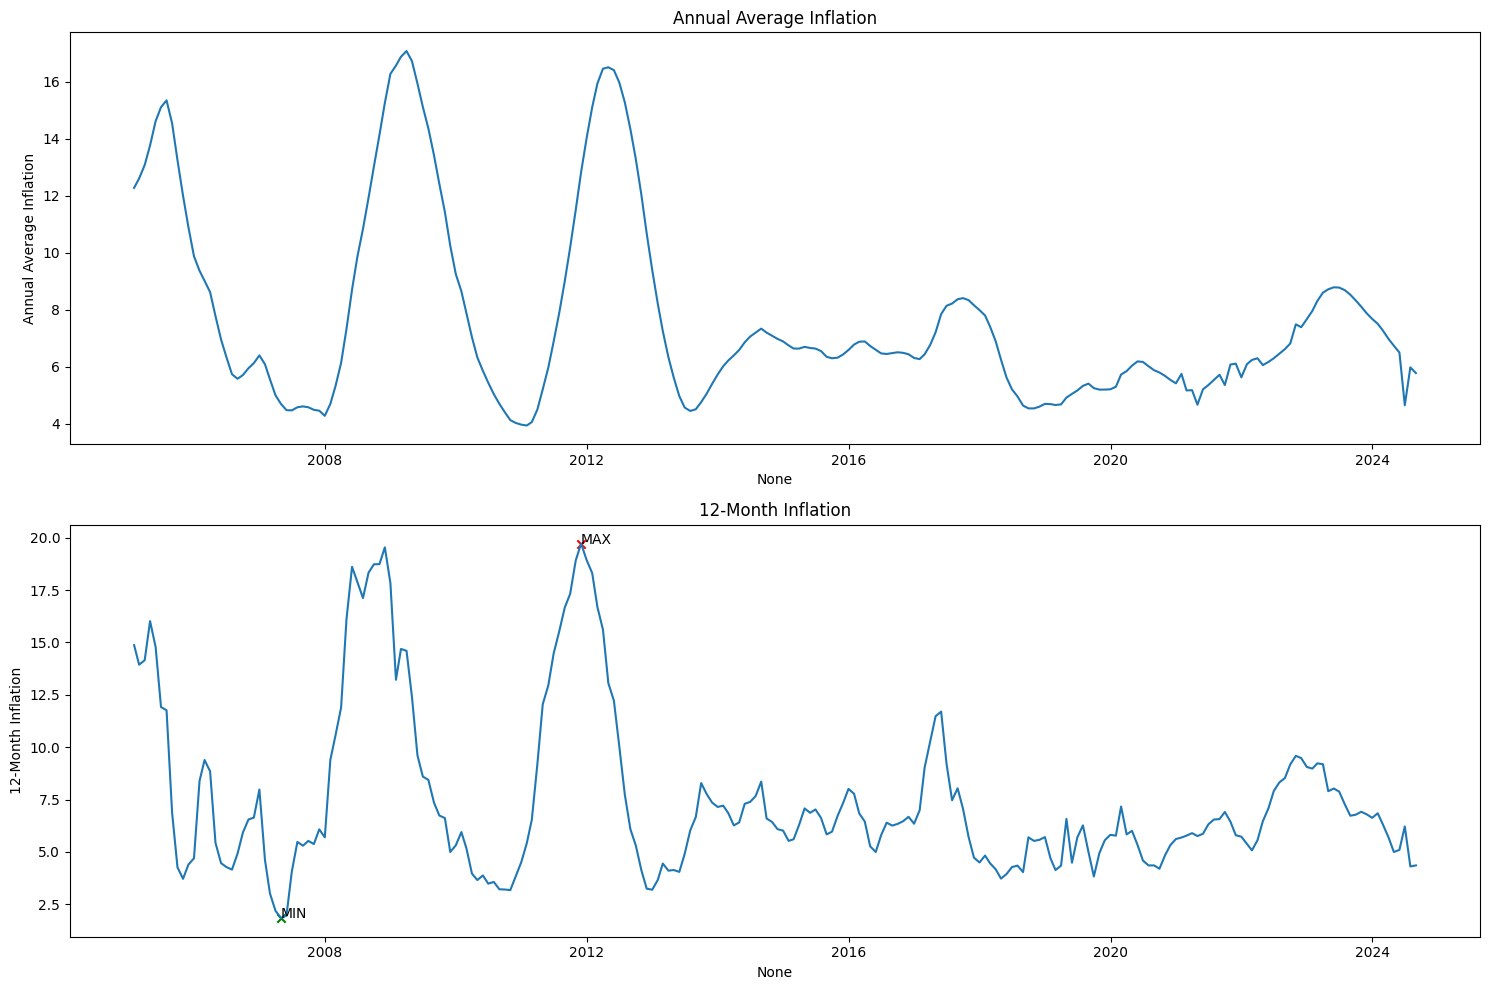

In [ ]:
# visualize the data to see trends
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=data, x=data.index, y='Annual Average Inflation', ax=axes[0])
sns.lineplot(data=data, x=data.index, y='12-Month Inflation', ax=axes[1])
#Mark the highest and lowest inflation rates
plt.scatter(highest_infl_index, highest_infl, color="red", marker="x")
plt.scatter(lowest_infl_index, lowest_infl, color="green", marker="x")

#Label the MAX and MIN inflation rates on your line graph
plt.annotate("MAX", (highest_infl_index, highest_infl))
plt.annotate("MIN", (lowest_infl_index, lowest_infl))

#Label the x-axis and y-axis
axes[0].set_title('Annual Average Inflation')
axes[1].set_title('12-Month Inflation')
plt.tight_layout()

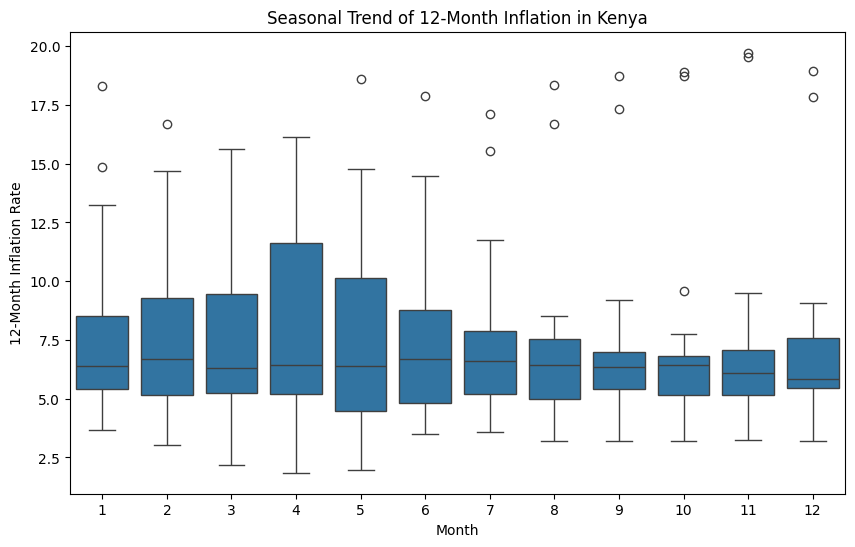

In [ ]:
 #Add Month as a separate column
data['Month'] = data.index.month

# Plot boxplot to observe seasonality in 12-Month Inflation
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='12-Month Inflation', data=data)
plt.title('Seasonal Trend of 12-Month Inflation in Kenya')
plt.xlabel('Month')
plt.ylabel('12-Month Inflation Rate')
plt.show()

Based on the box plot, we can observe some general trends in the inflation rate across different months:

Peak Inflation: The months of 4 and 5 appear to have the highest median inflation rates, suggesting a potential peak in inflation during those periods.
Lowest Inflation: The months of 1 and 12 seem to have the lowest median inflation rates, indicating a possible trough in inflation at the beginning and end of the year.
Seasonal Fluctuations: The overall shape of the box plots suggests a degree of seasonality in inflation, with certain months consistently experiencing higher or lower rates compared to others.

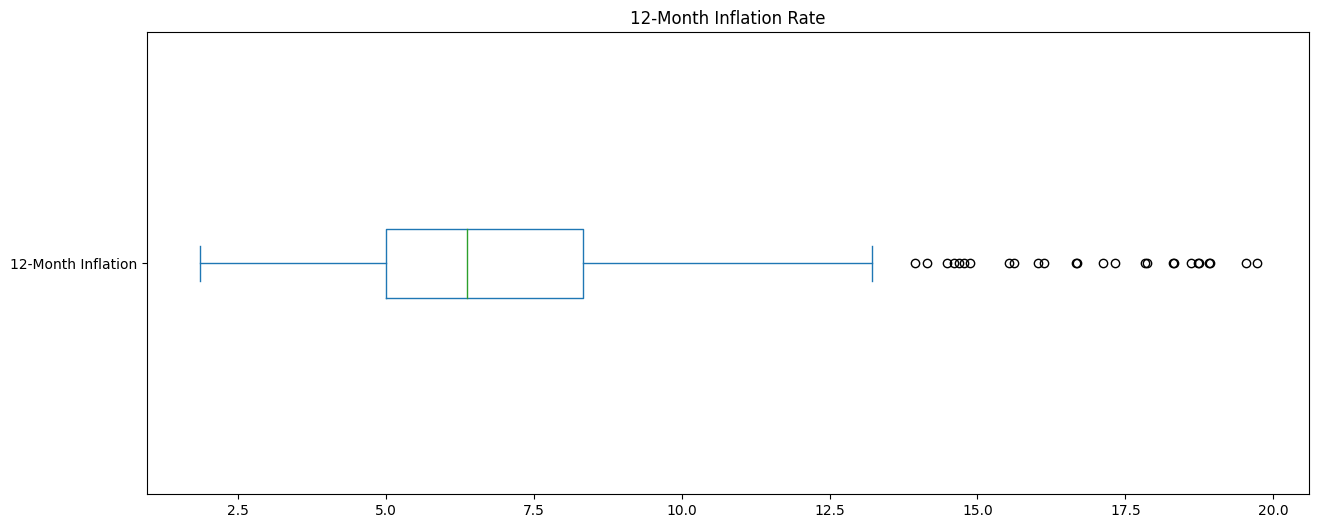

In [ ]:
#plot to detect outliers
fig, ax = plt.subplots(figsize=(15, 6))
data["12-Month Inflation"].plot(
    kind="box",
    vert=False,
    title="12-Month Inflation Rate"
);

 can observe unusually high values on the right side of the boxplot. Possible causes of these outliers include underlying economic conditions or exceptional events that temporarily disrupt the normal inflation trends

Text(0.5, 1.0, 'Inflation Volatility (12-Month Window)')

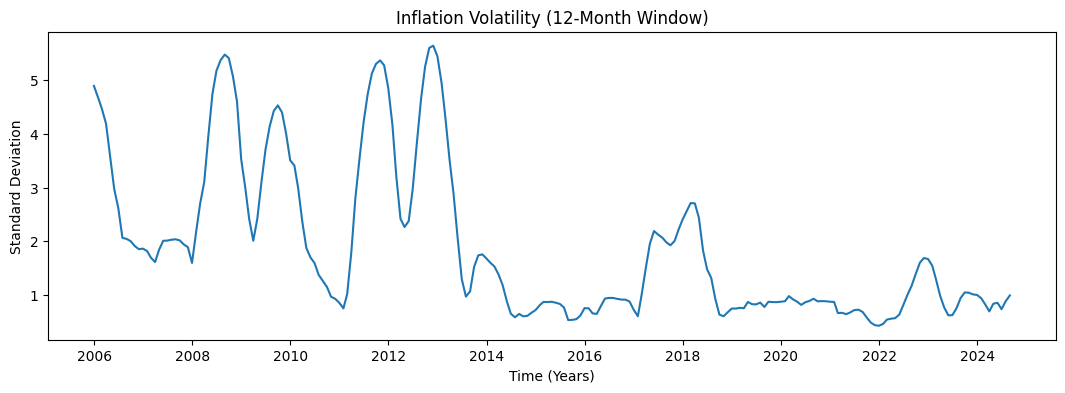

In [ ]:
#calculate the 12-month rolling window standard deviation
inflation_volatility = data["12-Month Inflation"].rolling(window=12).std()

#plot the results
fig, ax = plt.subplots(figsize=(13,4))
plt.plot(inflation_volatility)
plt.xlabel("Time (Years)")
plt.ylabel("Standard Deviation")
plt.title("Inflation Volatility (12-Month Window)")

12-month inflation rates dispersed widely from the average between 2005 and mid-2013. The same can be said for the period between 2017 and late 2018, as well as in 2023

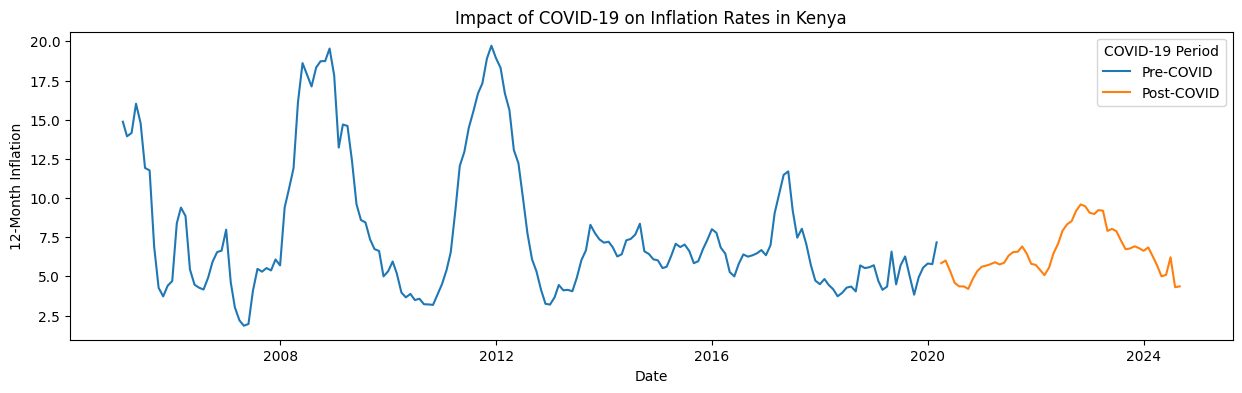

In [ ]:
#Event-Based Analysis,,,Analyze the impact of a specific event like COVID-19:
# Create a column to label pre- and post-COVID data
data['COVID-19 Period'] = ['Pre-COVID' if date < pd.to_datetime('2020-03-01') else 'Post-COVID' for date in data.index]
# Plot the 12-month inflation rates before and after COVID-19
plt.figure(figsize=(15,4))
sns.lineplot(data=data, x=data.index, y='12-Month Inflation', hue='COVID-19 Period')
plt.title('Impact of COVID-19 on Inflation Rates in Kenya')
plt.xlabel('Date')
plt.ylabel('12-Month Inflation')
plt.show()

Pre-COVID Trend: The blue line represents the inflation rate before the COVID-19 pandemic. It shows a relatively stable trend with some fluctuations.
COVID-19 Impact: The orange line indicates the inflation rate after the onset of the pandemic. There appears to be a noticeable spike in inflation immediately following the pandemic, followed by a general downward trend

# New Section

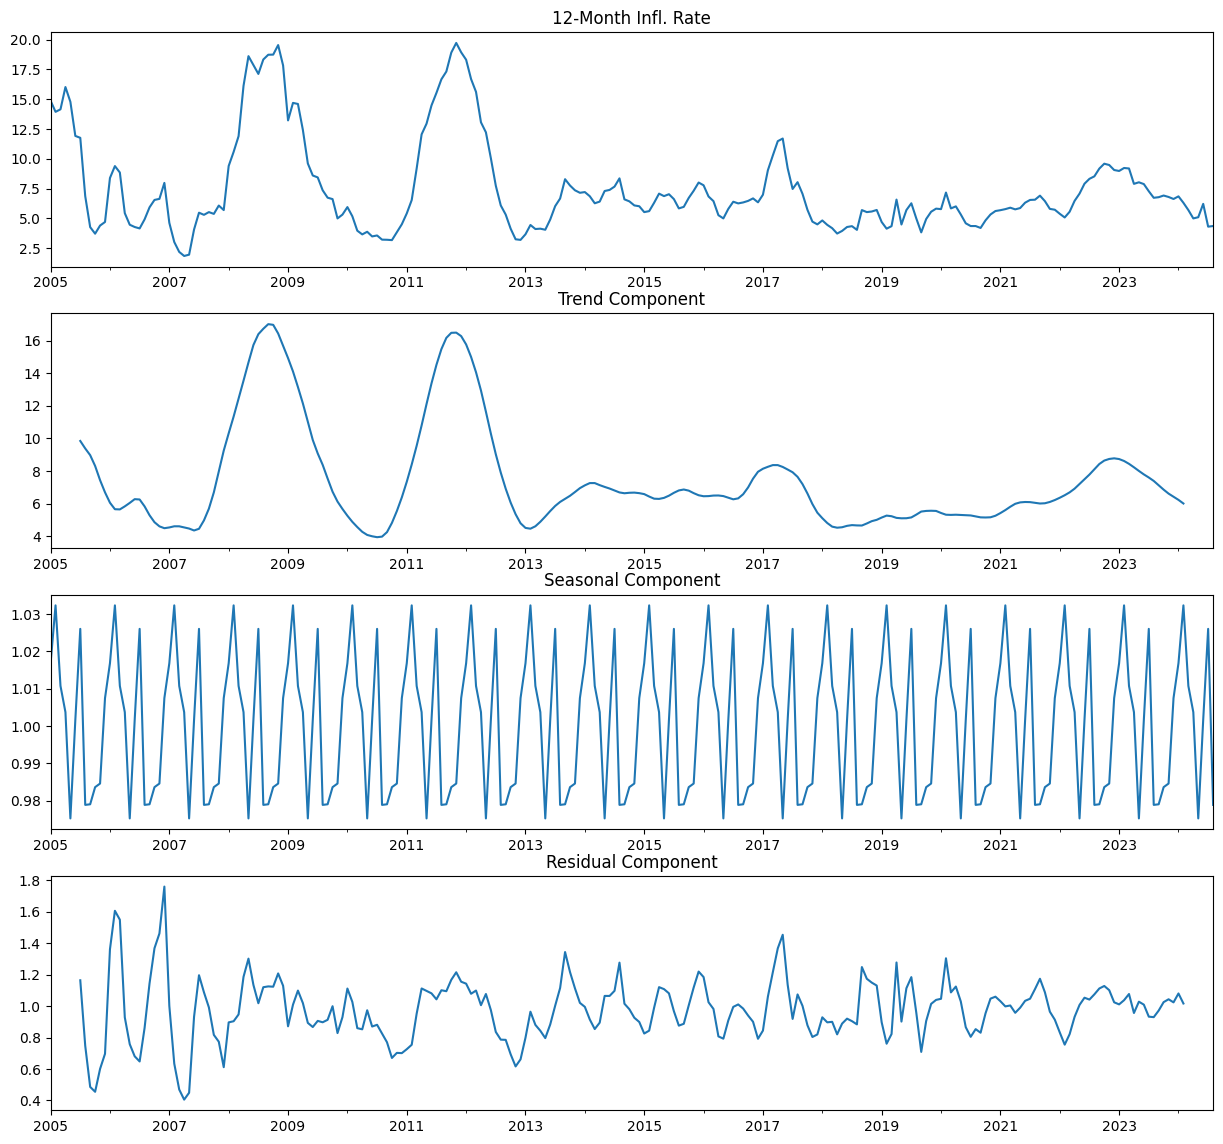

In [ ]:
#analyze three major components of a time series data at one go
#lets import the necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose

#decomposing the 12-month inflation rate
result = seasonal_decompose(
    data["12-Month Inflation"],
    model="multiplicative", #inflation rate data is generally multiplicative
    period=12
)


#plot 'results'
fig, axes = plt.subplots(4, 1, figsize=(15, 14))

#let's name/label the rows in the subplot grid
result.observed.plot(ax=axes[0], title = "12-Month Infl. Rate")
result.trend.plot(ax=axes[1], title = "Trend Component")
result.seasonal.plot(ax=axes[2], title = "Seasonal Component")
result.resid.plot(ax=axes[3], title = "Residual Component");

Trend component: This reveals the long-term direction of the 12-month inflation rate, with specific hiccups and troughs over time. Hiccups correspond to rapid increases in commodity prices, while troughs correspond to slower increases in CPI.

Seasonality component: The seasonal component represents the repeating short-term cycle in the data. This is a multiplicative time series data, with one being a benchmark of how far the data deviates from the trend. Let me break it down: actual values above the trend correspond to seasonality is greater than one; actual values equaling the trend correspond to seasonality is equal to one; actual values below the trend correspond to seasonality is less than one there exists a periodic fluctuation in the time series, which indicates that, more often than not, the 12-month inflation rate falls above the trend.

Residual component: This captures the white noise in the data. A sharp hiccup on the residual component might indicate anomalies or unexpected fluctuations in the data. We can observe unexpected fluctuations between 2005 and 2014. A deviation of more than one corresponds to a peak in the trend; a deviation of less than one corresponds to a trough in the trend.  

In [ ]:
# Install the required package
!pip install pydantic-settings
# Install ydata-profiling (recommended)
!pip install ydata-profiling

# Now you can import and use ydata_profiling
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ProfileReport(data, title = "Data Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Summary of Analysi**s

The highest inflation rate was recorded in November 2011, where it reached 19.72%. This means that during this time, prices for goods and services were rising very quickly.The lowest rate was in April 2007, at 1.85%. This means prices were increasing very slowly during this period.

**Seasonal Changes in Inflation**:

Inflation rates show a pattern that repeats each year. For example, inflation tends to be higher in April and May every year. On the other hand, inflation tends to be lower in January and December, meaning prices rise slower during these months compared to the rest of the year. This could be due to factors like spending patterns around holidays or agriculture cycles.

**Effects of COVID-19 on Inflation:**

Before the Pandemic (2019 and earlier): Inflation rates were relatively stable, meaning the rise in prices was more predictable. After COVID-19: There was a spike in inflation rates after the pandemic hit, meaning prices rose faster than usual. Since then, inflation has started to decrease but is still higher than before the pandemic.

**Decomposing the 12-Month Inflation Rate in Kenya**

 Original Series: The top plot shows the original 12-Month Inflation rate. It exhibits a clear upward trend with periodic fluctuations.

*Trend Component*: The second plot shows the trend component, which captures the long-term direction of the inflation rate. In this case, the trend appears to be slightly upward, suggesting a general increase in inflation over time.

*Seasonal Component*: The third plot shows the seasonal component, which captures the cyclical patterns that occur within a year. The seasonal component appears to be relatively stable, indicating a consistent seasonal pattern in inflation.

*Residual Componen*t: The bottom plot shows the residual component, which represents the random noise or unexplained variation in the data. The residuals appear to be relatively small and random, suggesting that the trend and seasonal components capture most of the variation in the inflation rate.

*Overall Trend*: Over time, inflation rates follow cycles where prices rise for some time and then fall. However, long-term prices are still going up. inflation tends to follow a pattern of being higher during certain months (like April and May) and lower during others (like January and December). There are times when inflation jumps suddenly due to unexpected events. These could be caused by economic crises, changes in global fuel , or political instability.